#### A1: Research Question

My research question is "What are the significant predictors of customer churn in the telecommunications industry, and how do they impact the likelihood of a customer discontinuing service?". This question aims to uncover which variables most significantly influence a customer's decision to leave the telecommunications company. I will be using KNN, which allow me to predict churn based on the similarity of customers' characteristics to those of customers who have either churned or remained.

#### A2: Goals of Analysis

The primary goal of this data analysis, utilizing the KNN classification method, is to accurately predict customer churn by identifying the most significant predictors and understanding their proximity impact on churn likelihood. This involves:

*    Identifying Key Features: Determining which customer demographic, account, and service-related features most closely associate with churned customers by analyzing the characteristics of neighbors (similar customers).
*    Understanding Customer Segments: Exploring the similarities among customers who churn to uncover specific patterns or segments that are at a higher risk of churn.
*    Informing Retention Strategies: Using insights from the analysis to inform targeted customer retention strategies. By understanding the profiles of customers at risk of churn, the company can develop tailored interventions aimed at retaining these customers.

#### B1: Justification for Classification Method

The k-nearest neighbors (KNN) classification method predicts a data point's class based on the majority class among its 'k' nearest neighbors. By calculating distances between customers using features like demographics, service usage, and account details, KNN identifies the 'k' closest customers to any given customer. The value of 'k' can be adjusted to optimize classification performance. Through the majority showing, a customer's classification as likely to churn or not is determined by the class prevalence among their nearest neighbors. This approach assumes that similar customers exhibit similar behaviors, such as the likelihood of discontinuing service.

Applying KNN to the telecommunications churn dataset is expected to reveal significant patterns and similarities between customers who churn and those who do not. This will enable the prediction of churn likelihood for each customer based on the characteristics of their nearest neighbors, offering a nuanced understanding of the behavioral patterns influencing churn. By identifying these patterns, KNN facilitates a more targeted approach to customer retention, aiming to reduce churn by addressing the most impactful factors identified through the analysis.

(sklearn documentation for KNeighborsClassifier)

#### B2: Assumption of KNN

One fundamental assumption of the KNN algorithm is that similar things exist in close proximity. In other words, it assumes that customers with similar characteristics. In terms of demographics, service subscriptions, account features, etc. are likely to exhibit similar behaviors such as churning or staying. This assumption underlies the method's reliance on the proximity of data points to classify them, assuming that the closer data points in the feature space are more likely to belong to the same class as their neighbors.

#### B3: Packages or Libaries for Python

I will be using Python for my programming language and the following packages or libraries are recommended:

*    Scikit-learn (sklearn): This is a primary library for machine learning in Python and includes efficient tools for data mining and data analysis. It offers a straightforward and efficient implementation of the KNN algorithm through its KNeighborsClassifier class. Scikit-learn also provides additional functionalities for preprocessing data, splitting the dataset into training and test sets, and evaluating model performance, making it a comprehensive choice for implementing KNN.

*    Pandas: Ideal for data manipulation and analysis, Pandas provides flexible data structures designed to make it easy to work with structured (tabular, multidimensional, potentially heterogeneous) data. It's particularly useful for reading, writing, and cleaning the dataset before applying KNN.

*    NumPy: This package supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. NumPy can be utilized for any numerical operations needed during the data preprocessing phase or feature engineering before applying KNN.

*    Matplotlib and Seaborn: These libraries are recommended for data visualization. They can be used to visualize the dataset and the results of the KNN analysis, such as plotting the distribution of customers who churn versus those who do not, or visualizing the decision boundaries created by the KNN model.

(sklearn documentation for KNeighborsClassifier)

#### C1: Data Preparation for KNN

A crucial data preprocessing goal for utilizing the k-nearest neighbors (KNN) algorithm is to normalize or standardize the numeric variables in the dataset. This step is essential because KNN calculates the distance between data points using the feature values. If the variables are on different scales, those with larger scales will disproportionately influence the distance calculations.This potentially could lead to biased results. Standardization ensures that each variables contributes equally to the distance computations, allowing for a more accurate identification of the 'k' nearest neighbors based on their similarities across all areas.

#### C2: Variables Selection

* Numeric: Tenure (months a customer has stayed with the provider)
* Numeric: MonthlyCharge (the amount charged to the customer monthly)
* Numeric: Bandwidth_GB_Year (average amount of data used in GB by the customer in a year)
* Numeric: Outage_sec_perweek (average number of seconds per week of system outages)
* Categorical: Contract (month-to-month, one year, two year)
* Categorical: OnlineSecurity (yes, no)
* Categorical: TechSupport (yes, no)
* Categorical: InternetService (DSL, fiber optic, None)
* Categorical: PaymentMethod (electronic check, mailed check, bank transfer, credit card)

#### C3: Data Preparation

In [14]:
# see attached codes

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1
# Loading the dataset
df = pd.read_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_1\churn_clean.csv')

# Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [15]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [16]:
# Fill missing value in 'InternetService' with 'None'
df['InternetService'].fillna('None', inplace=True)

In [17]:
# Identifying Missing Values
missing_values = df.isnull().sum()

print(missing_values)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [18]:
# Step 2 Set and Filter the Selected Variables

categorical_vars = ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod']

numerical_vars = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek']


In [19]:
# Step 3 Encode the Categorical Variables

# Applying one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [20]:
# Step 4 Standardize Numeric Variables

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical variables
df_encoded[numerical_vars] = scaler.fit_transform(df_encoded[numerical_vars])


In [21]:
bool_cols = ['Contract_One year', 'Contract_Two Year', 'OnlineSecurity_Yes', 
             'TechSupport_Yes','InternetService_Fiber Optic','InternetService_None', 
             'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']

columns_to_exclude =['Churn', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
                     'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 
                     'Marital', 'Gender', 'Techie', 'Port_modem', 'Tablet', 'Phone', 
                     'Multiple', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 
                     'StreamingMovies', 'PaperlessBilling', 'Item1', 'Item2', 'Item3', 
                     'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

# Convert boolean columns to integers
df_encoded[bool_cols] = df_encoded[bool_cols].astype(bool).astype(int)

X = df_encoded.drop(columns=columns_to_exclude, axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encoding the target variable

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CaseOrder                              10000 non-null  int64  
 1   Customer_id                            10000 non-null  object 
 2   Interaction                            10000 non-null  object 
 3   UID                                    10000 non-null  object 
 4   City                                   10000 non-null  object 
 5   State                                  10000 non-null  object 
 6   County                                 10000 non-null  object 
 7   Zip                                    10000 non-null  int64  
 8   Lat                                    10000 non-null  float64
 9   Lng                                    10000 non-null  float64
 10  Population                             10000 non-null  int64  
 11  Are

#### C4: Copy of Clean Dataset

In [22]:
# Saving the cleaned dataset
cleaned_file_path = (r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_1\churn_clean_After.csv')
X.to_csv(cleaned_file_path, index=False)

#### D1: Splitting the Data and Making Copies

In [23]:
# Step 5 Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Saving the training and test sets to CSV files
X_train.to_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_1\churn_clean_X_train.csv', index=False)
y_train.to_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_1\churn_clean_y_train.csv', index=False)
X_test.to_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_1\churn_clean_X_test.csv', index=False)
y_test.to_csv(r'C:\Users\Hien Ta\OneDrive\WGU\MSDA\D209\Task_1\churn_clean_y_test.csv', index=False)


#### D2. Description of the Analysis Technique

The analysis for predicting customer churn utilized the k-nearest neighbors (KNN) classification method. This is a versatile algorithm suitable for tackling both classification and regression tasks, though here it's specifically applied to a classification problem. KNN operates on the principle that similar instances tend to have similar outcomes, making it an ideal choice for predicting customer behavior based on historical data. By calculating the distance between instances in the feature space, KNN identifies the 'k' nearest instances to a given input and predicts its class based on the majority vote among these neighbors. This method is particularly effective for datasets where the relationship between variables and the target outcome is not linear. It relies on the proximity of instances in the feature space rather than assuming a specific form of the relationship.

In implementing KNN, I considered including the choice of 'k'. This is the distance metric used (with Euclidean distance being the most common), and the voting mechanism to determine the class of the input instance. The algorithm's efficacy relies on these parameters, which can be fine-tuned based on the dataset's characteristics and the specific requirements of the analysis. The evaluation of the KNN model's performance involves analyzing metrics such as accuracy, precision, recall, and F1 score. This provide insights into the model's predictive capabilities and areas for improvement. These metrics are derived from the confusion matrix, a tool that summarizes the model's predictions in comparison to the actual outcomes, enabling a detailed assessment of its strengths and weaknesses in predicting customer churn.

(Confusion-Matrix 2024)
(Datacamp class material, 2024)
(sklearn documentation for KNeighborsClassifier)

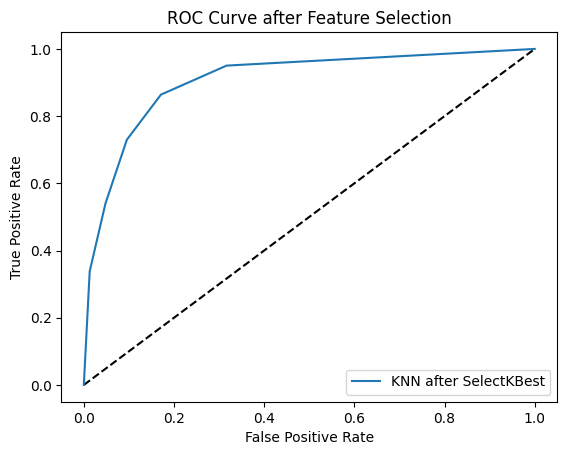

The (AUC) score is: 0.91

Confusion Matrix:
[[1317  139]
 [ 147  397]]

Accuracy: 0.857

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1456
           1       0.74      0.73      0.74       544

    accuracy                           0.86      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.86      0.86      0.86      2000



In [24]:
# see attached codes

# Create a feature selection and classification pipeline
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Select top 10 features
    ('classification', KNeighborsClassifier(n_neighbors=5))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Predict probabilities for calculating ROC curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN after SelectKBest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after Feature Selection')
plt.legend(loc="lower right")
plt.show()


# Print the AUC score
print(f"The (AUC) score is: {roc_auc_score(y_test, y_pred_prob):.2f}\n")

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#### D3. Classification Analysis Codes

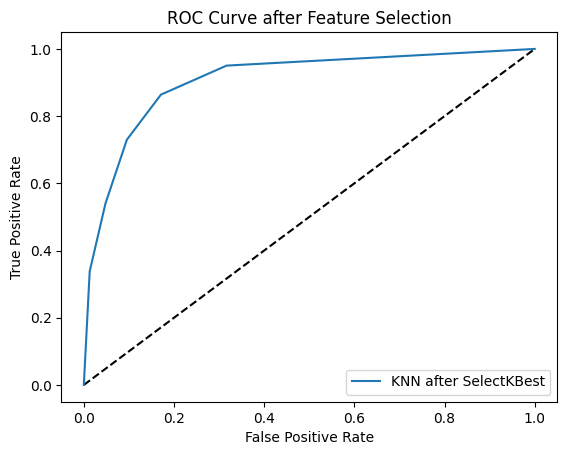

The (AUC) score is: 0.91

Confusion Matrix:
[[1317  139]
 [ 147  397]]

Accuracy: 0.857

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1456
           1       0.74      0.73      0.74       544

    accuracy                           0.86      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.86      0.86      0.86      2000



In [25]:
# see attached codes

# Create a feature selection and classification pipeline
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # Select top 10 features
    ('classification', KNeighborsClassifier(n_neighbors=5))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Predict probabilities for calculating ROC curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='KNN after SelectKBest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after Feature Selection')
plt.legend(loc="lower right")
plt.show()


# Print the AUC score
print(f"The (AUC) score is: {roc_auc_score(y_test, y_pred_prob):.2f}\n")

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#### E1: Model Accuracy

The accuracy of our KNN classification model stands at 0.857, indicating that 86% of the predictions made by the model were correct. This high level of accuracy suggests that the model is robust in distinguishing between customers who will churn and those who will not based on the provided features.

The Area Under the Curve (AUC) for my model is 0.91. The AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). With an AUC of 0.91, the model shows excellent prediction ability. It implies that there is a 91% chance that the model will be able to distinguish between a randomly chosen positive instance where a customer who will churn and a negative instance where a customer who will not churn. This high AUC score corroborates the accuracy metric, indicating that the model performs well across different threshold levels.



#### E2: Results and Implications

The results of the classification analysis suggest that the model is quite effective in predicting customer churn. The high accuracy and AUC indicate that the model can be trusted to make reliable predictions in most cases. Given the model's performance, it can be inferred that the selected features are meaningful indicators of churn behavior.

It's important to note that while the model performs well overall. The precision and recall for the positive class 1 (churned customers) are lower than those for the negative class 0. This could imply that while the model is good at identifying customers who won't churn, it may still misclassify a notable number of customers who will churn. The implications for a telecommunications company could include missed opportunities for targeted interventions to retain customers at risk of churning.

#### E3: Limitation of Data Analysis

One limitation of the analysis is the potential for imbalanced class distribution, where the number of non-churned customers can significantly outnumber churned customers. This imbalance can bias the model towards predicting the majority class. Also, the model's reliance on proximity in feature space can be a limitation if the churn factors are complex and not easily captured. Another limitation could be the lack of temporal dynamics in the analysis. Customer behavior and risk of churn could evolve over time, and a static model may not capture these trends effectively.

#### E4: Recommendation

Based on the results and implications of the analysis, I recommend that the telecommunications company undertake the following actions:

*    Implement the Model: Utilize the KNN model to identify customers at high risk of churn. This can be integrated into the company's customer relationship management system to flag high-risk customers for further action.

*    Focus on Customer Retention: Develop targeted retention strategies aimed at the segments identified as high risk. This could include personalized offers, improved customer service, or other incentives to enhance satisfaction and loyalty.

*    Continuously Update the Model: Regularly update the model with new data to ensure its predictive power remains strong. Periodic retraining can help the model adapt to changing customer behaviors and market conditions.

*    Address Model Limitations: Explore additional data sources that may provide a more dynamic view of customer behavior over time. Also, consider using other models or machine learning techniques that can handle imbalanced datasets more effectively.

*    Monitor Model Performance: Continuously monitor the performance of the model in actual use and make adjustments as needed based on feedback and results.


#### F: Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0bd5cd37-fe2f-4829-90f0-b135003ae5d0


#### G: Code References

* I used some of the codes from my D208 Task 2.
* (Datacamp class material, 2024): https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification-1?ex=1
* (Dr. Elleh's webinar, nd): https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b73b6274-ef01-4d1b-a59f-aed100228a93


#### H: Source Reference

* (sklearn documentation for KNeighborsClassifier) : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

* (Datacamp class material, 2024): https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification-1?ex=1

* (Dr. Elleh's webinar, nd): https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b73b6274-ef01-4d1b-a59f-aed100228a93

* (Confusion-Matrix 2024): https://scikit-learn.org/stable/modules/model_evaluation.html#confusionmatrix